# Chapter 1: Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats # for trimming
import weightedstats as ws # for weighted median
from statsmodels import robust
import matplotlib.pyplot as plt

%matplotlib inline

# Estimates of Location
Here we have the sample code which tell you the location of a typical value in a dataset

In [3]:
data = pd.read_csv('../data/state.csv')

# Example 1
print('Mean of Population Without Trimming :',data.loc[:,'Population'].mean())
print('Mean of Population After Trimming :',stats.trim_mean(data.loc[:,'Population'], 0.1))
print('Median of Population :',np.median(data.loc[:,'Population']))
print('Weighted Mean of Murder.Rate :',np.average(data.loc[:,'Murder.Rate'],weights=data.loc[:,'Population']))
print('Weighted Median of Murder.Rate :',ws.weighted_median(data.loc[:,'Murder.Rate'],weights=data.loc[:,'Population']))

Mean of Population Without Trimming : 6162876.3
Mean of Population After Trimming : 4783697.125
Median of Population : 4436369.5
Weighted Mean of Murder.Rate : 4.445833981123393
Weighted Median of Murder.Rate : 4.4


/home/taekgookim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


## Key Idea:
Basic metric for location is mean, but that is sensitive to extreme values.

Median and Trimmed Mean are more robust

# Estimates of Variability:
From the Book :'Location is just one dimension in summarizing a feature. A second dimension, variabilitym also referred to as dispersion, measures whether the data values are tightly clustered or seperated out. At the heart of statistics lies variability, identifying the various sources of real variability and making decisions in the presence of it'

In [4]:
print('Standard deviation of Population is : ',data.loc[:,'Population'].std())
q75, q25 = np.percentile(data.loc[:,'Population'], [75 ,25])
iqr = q75 - q25
print('Standard deviation of Population is : ',iqr)
print('Median Absolute Deviation from Median (MAD) : ',robust.mad(data.loc[:,'Population'], axis=0))

Standard deviation of Population is :  6848235.347401142
Standard deviation of Population is :  4847308.0
Median Absolute Deviation from Median (MAD) :  3849876.1459979336


Here we can see that Standard deviation is twice that of MAD. Thats because Standard Deviation is very sensitive to outliers

# Exploring the Data Distribution

In [5]:
q05, q25, q50, q75, q95 = np.percentile(data.loc[:,'Murder.Rate'], [5,25,50,75,95])

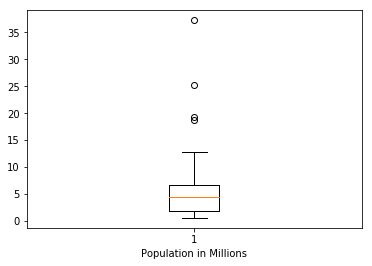

In [6]:
#Boxplot
plt.boxplot((data.loc[:,'Population'])/1000000)
plt.xlabel('Population in Millions')
plt.show()

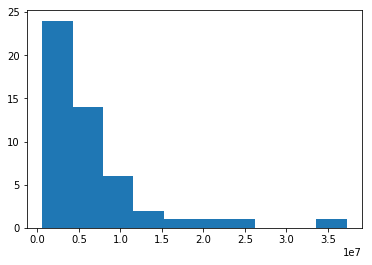

In [7]:
#Histogram
plt.hist(data.loc[:,'Population'])
plt.show()

/home/taekgookim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


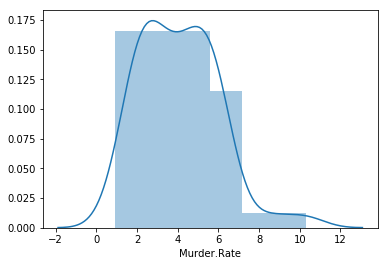

In [8]:
#Simple Desity Plot
sns.distplot(data.loc[:,'Murder.Rate'])

/home/taekgookim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


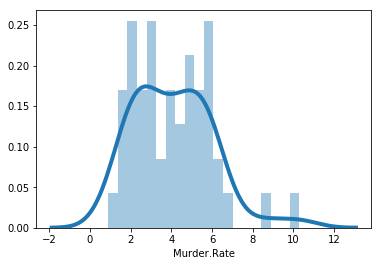

In [9]:
sns.distplot(data.loc[:,'Murder.Rate'],hist=True, kde=True,kde_kws={'linewidth': 4},bins=20)

# Exploring Binary and Categorical Data

In [10]:
data2 = pd.read_csv('../data/dfw_airline.csv')

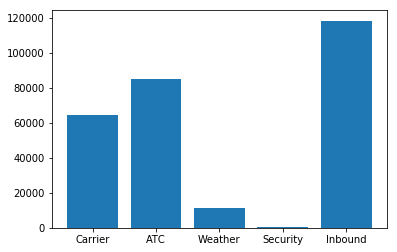

In [11]:
plt.bar(data2.columns,data2.iloc[0])
plt.show()

### Key Take Away:
Categorical data is summed up in proportions and can be visualized in a bar plot

# Correlation

In [12]:
data3 = pd.read_csv('../data/sp500_px.csv')

In [13]:
data4 = data3[(data3['Unnamed: 0'])>'2012-07-01'][['T','CTL','FTR','VZ','LVLT']]

In [14]:
data4.corr(method='pearson')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [15]:
#here we can see all the correlation scores betweent the variables
data4.corr(method='spearman')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.495345,0.324027,0.664985,0.289232
CTL,0.495345,1.000000,0.371543,0.423900,0.251322
FTR,0.324027,0.371543,1.000000,0.269324,0.267911
VZ,0.664985,0.423900,0.269324,1.000000,0.245456
LVLT,0.289232,0.251322,0.267911,0.245456,1.000000


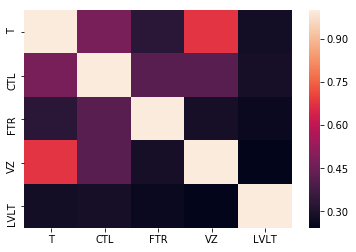

In [16]:
sns.heatmap(data4.corr())

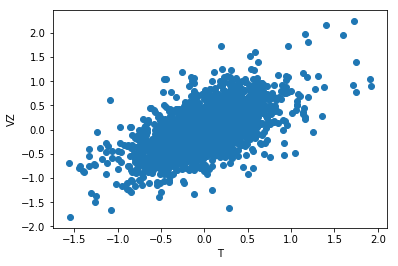

In [17]:
#here we can see that there is indeed a strong correlation between T and VZ
plt.scatter(data3['T'],data3['VZ'])
plt.xlabel('T')
plt.ylabel('VZ')
plt.show()

# Exploring two or more variables

## For Numeric vs Numeric Data:
We can use scatter plots where there are less number of datapoints in a dataset. However, if there are thousands then the plot becomes too dense. Hence we need a Hexagonal Plot for that reason

In [18]:
data5 = pd.read_csv('../data/kc_tax.csv')
data6 = data5[(data5['SqFtTotLiving']>100) & (data5['SqFtTotLiving']<3500) & (data5['TaxAssessedValue']<750000)]

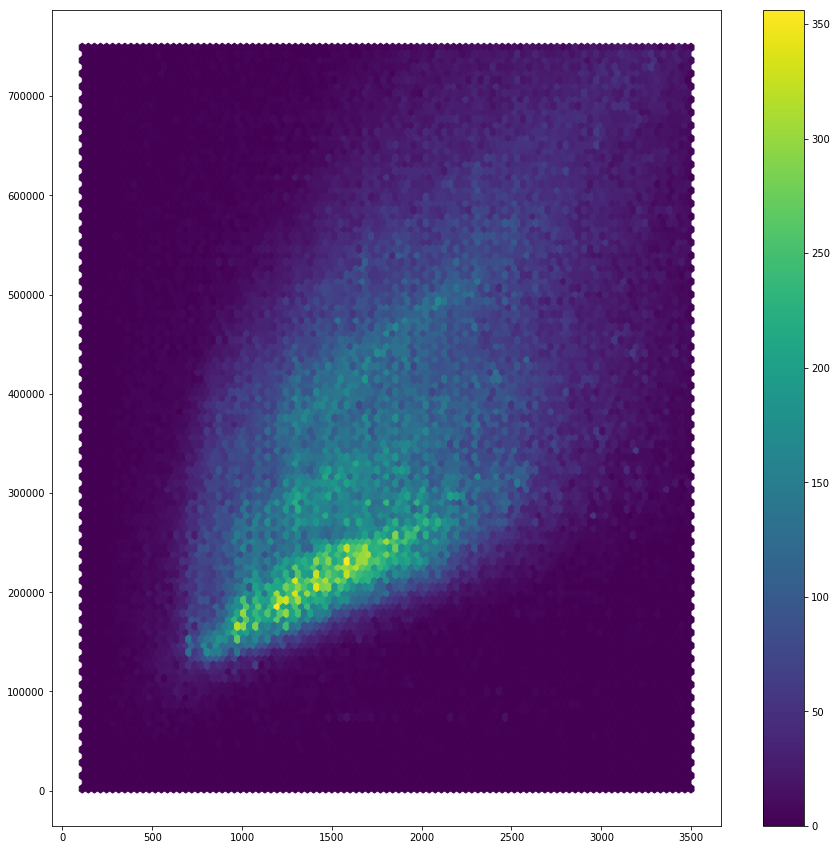

In [19]:
plt.figure(figsize=(15,15))
plt.hexbin(data6['SqFtTotLiving'],data6['TaxAssessedValue'])
plt.colorbar()
plt.show()

/home/taekgookim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


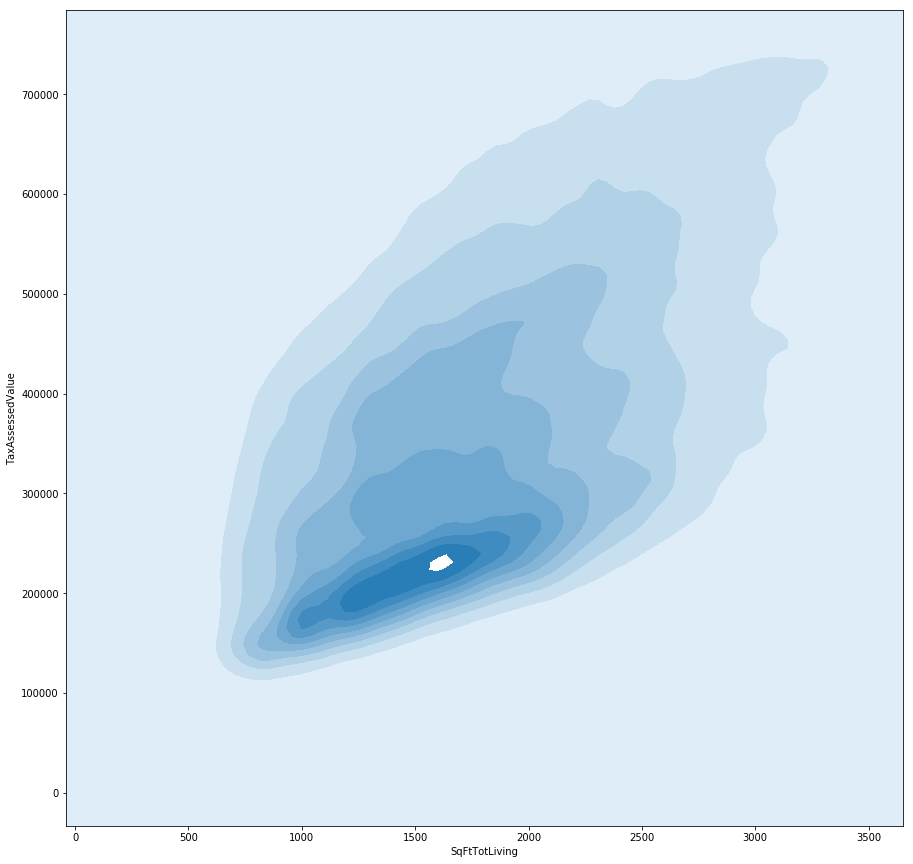

In [20]:
plt.figure(figsize=(15,15))
sns.kdeplot(data6['SqFtTotLiving'],data6['TaxAssessedValue'],shade=True)
plt.show()

In [21]:
airline_stats = pd.read_csv('../data/airline_stats.csv')
airline_stats.airline.value_counts() 
airline_stats = airline_stats.fillna(0)

# For Categorical vs Numerical


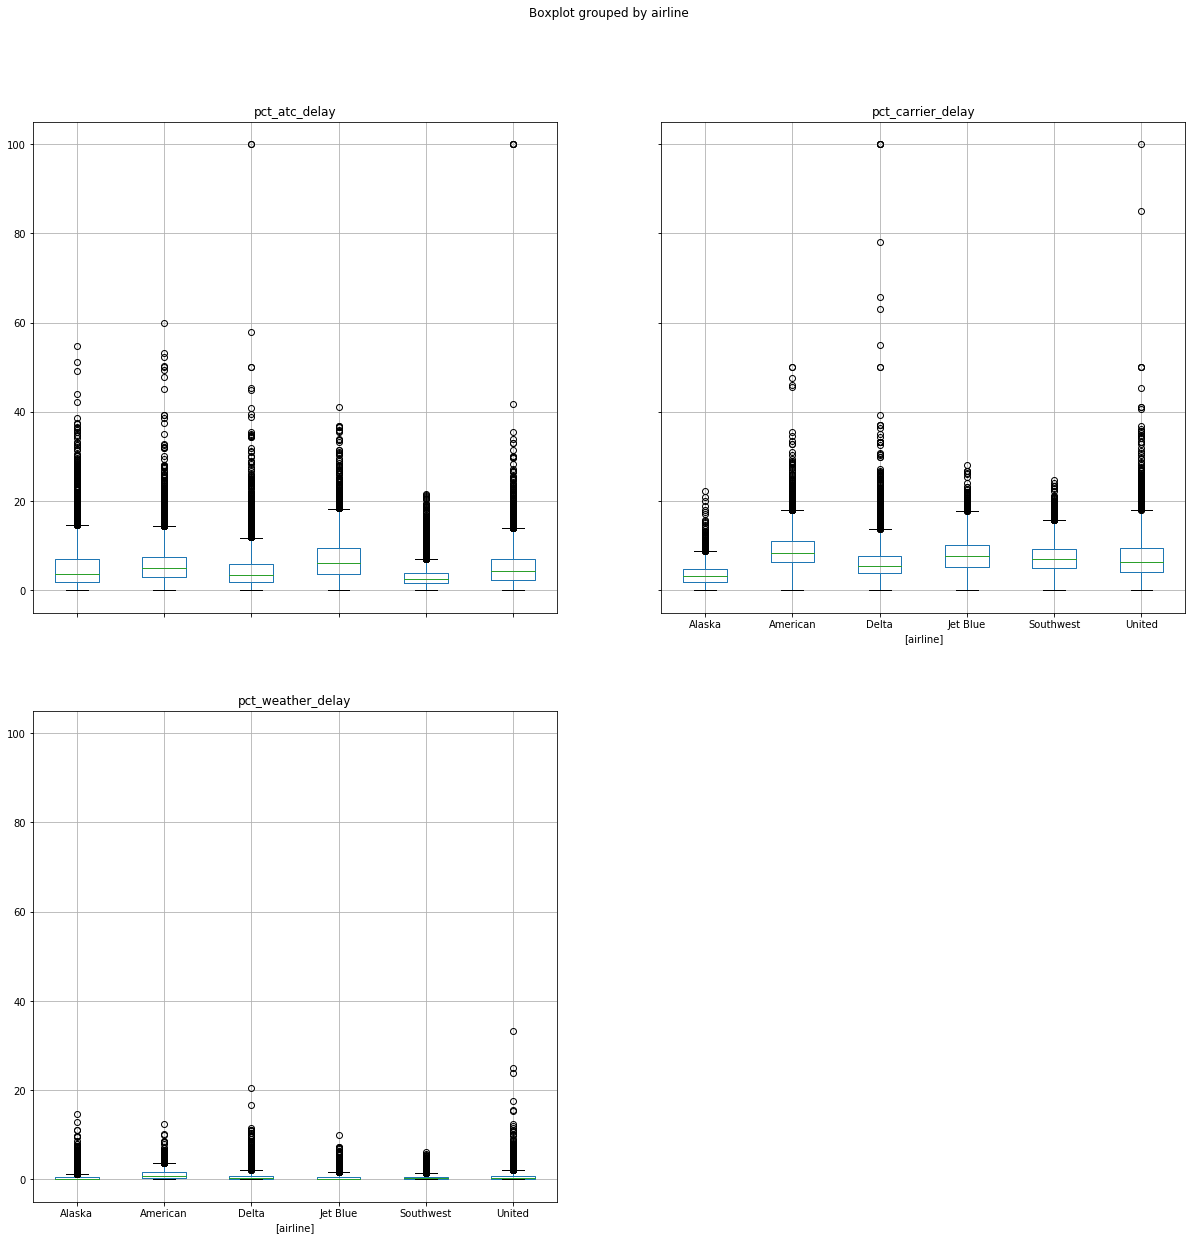

In [22]:
airline_stats.boxplot(by='airline',figsize=(20,20))
plt.show()

Text(0.5,1,'% of Delayed Fights')

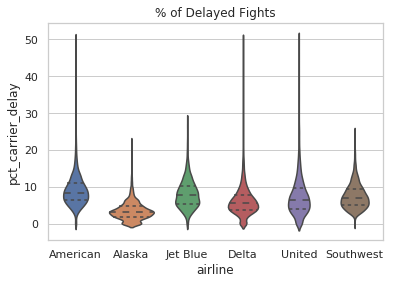

In [23]:
# you could do a violin plot too
sns.set(style="whitegrid")
sns.violinplot(x=airline_stats['airline'], y=airline_stats[airline_stats['pct_carrier_delay'] <= 50].pct_carrier_delay, inner='quartile')
plt.title("% of Delayed Fights")